In [18]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
## Read the data
df = pd.read_csv("data.csv", encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
## check null values
df.isnull().sum().sort_values(ascending= False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [23]:
## Drop the null valuues
## Dropping description null values as it will affect the engine as it be based on product description
df_new =df.dropna(subset = ["Description"])

In [25]:
df_new.isnull().sum().sort_values(ascending=False)

CustomerID     133626
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [26]:
## Describe the dataframe
## Here data can be checked for data quality such as if there are any negative values in the column those should contain 
## only positive values
## Eg: Price of a product

df_new.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [27]:
## Remove negative quantity
df_new = df_new[df_new["Quantity"]>0]

In [29]:
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,530693.000000,530693.000000,397924.000000
mean,10.605819,3.861599,15294.315171
std,156.637853,41.833162,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## Rule Based Recommendations

### 1.Popular Items Globally

In [34]:
## Pivoting to get the top 10 items globally by quantity

global_popularit_df = df_new.pivot_table(index=['StockCode','Description'],values='Quantity',aggfunc='sum').\
                                         sort_values(by="Quantity", ascending=False)

global_popularit_df.head(10)

,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
85099B,JUMBO BAG RED RETROSPOT,48478
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
22197,POPCORN HOLDER,36761
84879,ASSORTED COLOUR BIRD ORNAMENT,36461
21212,PACK OF 72 RETROSPOT CAKE CASES,36419
23084,RABBIT NIGHT LIGHT,30788


Text(0, 0.5, 'Item')

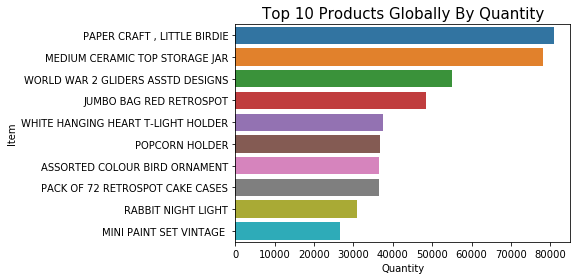

In [37]:
## Viz - Top products globally by quantity

global_popularit_df.reset_index(inplace=True)
sns.barplot(y='Description', x="Quantity", data=global_popularit_df.head(10))
plt.title("Top 10 Products Globally By Quantity", fontsize = 15)
plt.ylabel("Item")


### 2. Popular Items Countrywise

In [38]:
# Pivoting to get top products by quantity and country

countrywise = df_new.pivot_table(index = ["Country","StockCode","Description"], values = "Quantity", aggfunc='sum').reset_index()

Text(0, 0.5, 'Item')

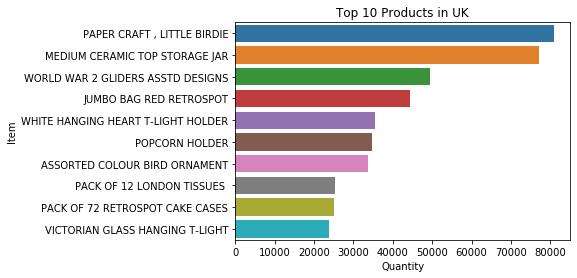

In [42]:
# Viz
sns.barplot(y='Description', x='Quantity',data=countrywise[countrywise['Country']=="United Kingdom"].\
                                                                sort_values(by = 'Quantity',ascending=False).head(10))
plt.title("Top 10 Products in UK")
plt.ylabel("Item")

Text(0, 0.5, 'Item')

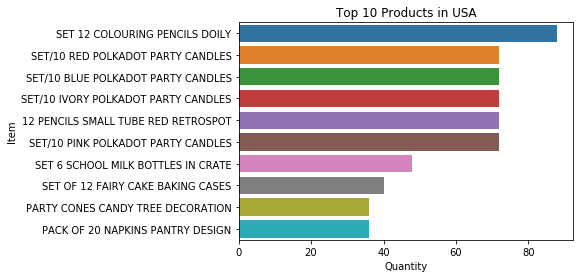

In [45]:
# Viz
sns.barplot(y='Description', x='Quantity',data=countrywise[countrywise['Country']=="USA"].\
                                                                sort_values(by = 'Quantity',ascending=False).head(10))
plt.title("Top 10 Products in USA")
plt.ylabel("Item")

Text(0, 0.5, 'Item')

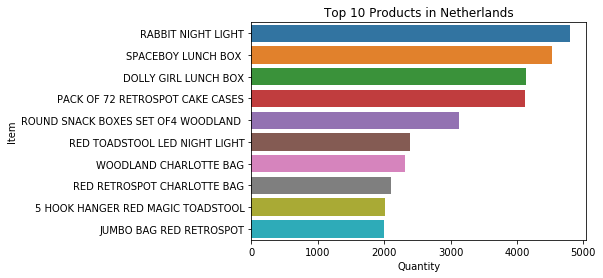

In [47]:
# Viz
sns.barplot(y='Description', x='Quantity',data=countrywise[countrywise['Country']=="Netherlands"].\
                                                                sort_values(by = 'Quantity',ascending=False).head(10))
plt.title("Top 10 Products in Netherlands")
plt.ylabel("Item")

Text(0, 0.5, 'Item')

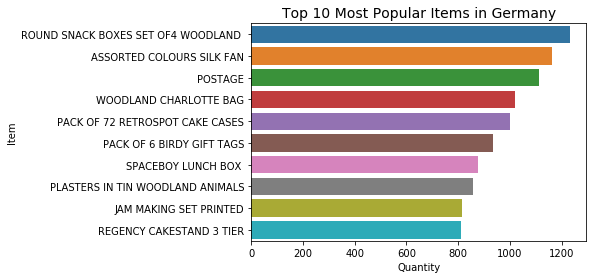

In [48]:
#Viz
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise['Country']=='Germany'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in Germany', fontsize=14)
plt.ylabel('Item')

### 3. Popular Items Monthwise

In [51]:
# Date Time

import datetime

df_new['InvoiceDate'] = pd.to_datetime(df_new.InvoiceDate, format='%m/%d/%Y %H:%M')
df_new.insert(loc=2, column='year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year  + x.month))
df_new.insert(loc=3, column='month',value=df_new.InvoiceDate.dt.month)


# +1 to make Monday=1
df_new.insert(loc=4, column='day', value=(df_new.InvoiceDate.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.InvoiceDate.dt.hour)

In [52]:
df_new.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Text(0, 0.5, 'Items')

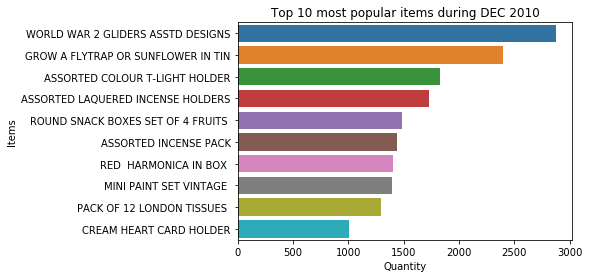

In [54]:
# Viz - Popular items by month
sns.barplot(y='Description',x='Quantity', data=df_new[df_new['year_month']==201012].sort_values(by='Quantity',ascending=False).head(10))
plt.title("Top 10 most popular items during DEC 2010")
plt.ylabel("Items")

Text(0, 0.5, 'Item')

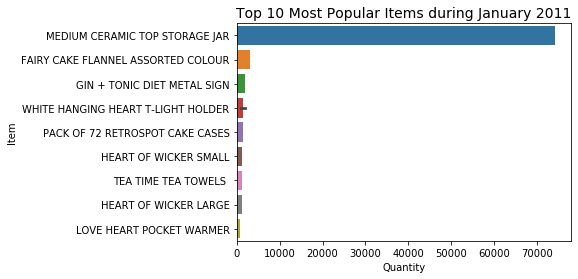

In [55]:
#viz
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201101].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during January 2011', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

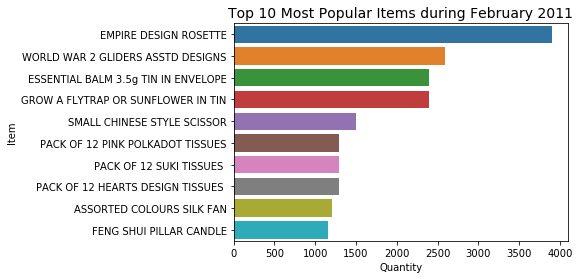

In [56]:
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201102].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during February 2011', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

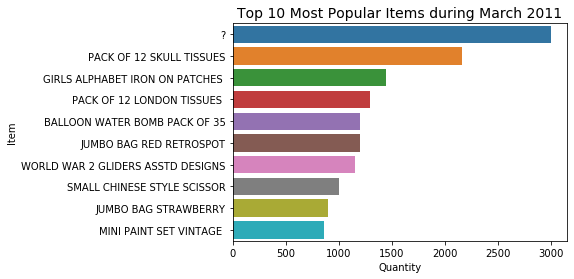

In [57]:
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201103].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during March 2011', fontsize=14)
plt.ylabel('Item')

### 4. Buy Again

In [58]:
from collections import Counter

# Extracting all the items bought by customer 17859
description = df_new[df_new['CustomerID']==17850].Description

# Counting the number of time that purchase hass been repeated
count = Counter(description)

# Counter sort the items in descending order of purchased count
# Print the values
print(count)

Counter({'WHITE HANGING HEART T-LIGHT HOLDER': 17, 'WHITE METAL LANTERN': 17, 'KNITTED UNION FLAG HOT WATER BOTTLE': 17, 'RED WOOLLY HOTTIE WHITE HEART.': 17, 'GLASS STAR FROSTED T-LIGHT HOLDER': 17, 'HAND WARMER UNION JACK': 17, 'HAND WARMER RED POLKA DOT': 17, 'SET 7 BABUSHKA NESTING BOXES': 16, 'CREAM CUPID HEARTS COAT HANGER': 15, 'RETRO COFFEE MUGS ASSORTED': 15, 'VINTAGE BILLBOARD DRINK ME MUG': 15, 'VINTAGE BILLBOARD LOVE/HATE MUG': 15, 'WOOD 2 DRAWER CABINET WHITE FINISH': 15, 'WOODEN PICTURE FRAME WHITE FINISH': 15, 'WOODEN FRAME ANTIQUE WHITE ': 15, 'SAVE THE PLANET MUG': 14, 'WOOD S/3 CABINET ANT WHITE FINISH': 14, 'JUMBO SHOPPER VINTAGE RED PAISLEY': 10, 'IVORY EMBROIDERED QUILT ': 8, 'EDWARDIAN PARASOL RED': 7, 'EDWARDIAN PARASOL BLACK': 4})


In [65]:
## Define a buy_again function

def buy_again(customerID):
    # fetch items using customer id
    items_bought = df_new[df_new['CustomerID']==customerID].Description
    
    # Count and sort the items on repeated purchase
    bought_again = Counter(items_bought)
    
    # COnvert the counter to list
    buy_again_list = list(bought_again)
    
    #printing the recommendations
    print("Items you would like to buy again : ")
    return(buy_again_list)

In [66]:
buy_again(17850)

Items you would like to buy again : 


['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'EDWARDIAN PARASOL RED',
 'RETRO COFFEE MUGS ASSORTED',
 'SAVE THE PLANET MUG',
 'VINTAGE BILLBOARD DRINK ME MUG',
 'VINTAGE BILLBOARD LOVE/HATE MUG',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOOD S/3 CABINET ANT WHITE FINISH',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'EDWARDIAN PARASOL BLACK',
 'IVORY EMBROIDERED QUILT ',
 'JUMBO SHOPPER VINTAGE RED PAISLEY']

In [74]:
buy_again(17800)

Items you would like to buy again : 


['ROSE COTTAGE KEEPSAKE BOX ',
 'GROW YOUR OWN PLANT IN A CAN ',
 'FELTCRAFT 6 FLOWER FRIENDS',
 'FELTCRAFT BUTTERFLY HEARTS',
 'NATURAL SLATE RECTANGLE CHALKBOARD',
 'CITRUS GARLAND FELT FLOWERS ',
 '12 PENCILS SMALL TUBE SKULL',
 '12 DAISY PEGS IN WOOD BOX',
 'VINTAGE UNION JACK BUNTING',
 'PINK CREAM FELT CRAFT TRINKET BOX ',
 'WOODEN HAPPY BIRTHDAY GARLAND',
 'FELTCRAFT CUSHION OWL',
 'PINK BLUE FELT CRAFT TRINKET BOX',
 'GROW A FLYTRAP OR SUNFLOWER IN TIN',
 '3 STRIPEY MICE FELTCRAFT',
 'TEA TIME PARTY BUNTING',
 'PINK PARTY BAGS',
 'FELTCRAFT CUSHION RABBIT',
 'Manual',
 'LUNCH BAG SUKI DESIGN ',
 'SKULLS PARTY BAG + STICKER SET',
 'BLUE PARTY BAGS ',
 'LUNCH BAG CARS BLUE',
 'COLOURING PENCILS BROWN TUBE',
 'RIBBON REEL CHRISTMAS PRESENT ',
 'RIBBON REEL CHRISTMAS SOCK BAUBLE',
 'RIBBON REEL MAKING SNOWMEN ',
 'LUNCH BAG  BLACK SKULL.',
 'CHRISTMAS CRAFT LITTLE FRIENDS',
 'CHRISTMAS CRAFT WHITE FAIRY ',
 'CHRISTMAS CRAFT TREE TOP ANGEL',
 'LUNCH BAG RED RETROSPOT',
 'FELTCRAFT H